### Import required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.naive_bayes     import GaussianNB

from sklearn.metrics         import classification_report,confusion_matrix
from sklearn                 import metrics
from scipy.stats             import zscore

%matplotlib inline

### EDA

In [3]:
personal_loan_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

personal_loan_df.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
393,394,53,28,18,90095,4,0.1,3,109,0,1,1,1,1
505,506,36,12,69,94305,3,3.1,2,0,1,0,0,1,0
3079,3080,55,31,23,95616,2,0.3,1,0,0,0,0,1,1
460,461,60,36,141,90277,2,2.1,1,0,0,0,0,1,1
3648,3649,43,13,38,95616,3,2.0,3,0,0,0,0,1,0
169,170,27,1,112,90503,4,2.1,3,0,0,0,0,0,1
1558,1559,35,10,72,91320,3,2.3,1,285,0,0,0,0,0
181,182,36,12,10,93524,4,0.7,2,81,0,0,0,0,0
3051,3052,60,35,48,94538,3,1.5,1,0,0,0,0,1,0
3574,3575,56,30,64,95123,3,0.3,2,0,0,0,0,0,1


In [4]:
personal_loan_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [5]:
personal_loan_df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [6]:
personal_loan_df[['Age', 'Experience', 'Income']].corr()

,Age,Experience,Income
Age,1.000000,0.994215,-0.055269
Experience,0.994215,1.000000,-0.046574
Income,-0.055269,-0.046574,1.000000


In [7]:
column_number =  personal_loan_df.columns.get_loc('ZIP Code')
print (column_number)

4


In [8]:
for index, row in personal_loan_df.iterrows():
    zip_code_value = row['ZIP Code']
    if  zip_code_value < 91000:
        personal_loan_df.iloc[index,column_number] = 'Area_1'        
    elif zip_code_value > 91000 and zip_code_value < 92000:
         personal_loan_df.iloc[index,column_number] = 'Area_2'
    elif zip_code_value > 92000 and zip_code_value < 93000:
         personal_loan_df.iloc[index,column_number] = 'Area_3'
    elif zip_code_value > 93000 and zip_code_value < 94000:
         personal_loan_df.iloc[index,column_number] = 'Area_4'
    elif zip_code_value > 94000:
         personal_loan_df.iloc[index,column_number] = 'Area_5'

In [10]:
personal_loan_df_new = pd.get_dummies(personal_loan_df, prefix_sep='_', columns=['ZIP Code'], drop_first=True) 

In [11]:
personal_loan_df_new.sample(10)

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,ZIP Code_Area_2,ZIP Code_Area_3,ZIP Code_Area_4,ZIP Code_Area_5
3145,3146,34,10,114,3,3.3,3,0,1,0,0,0,0,0,0,0,1
1952,1953,30,5,78,1,2.6,2,0,0,0,0,1,0,0,1,0,0
2274,2275,40,15,21,2,0.0,3,0,0,0,0,1,0,0,0,0,0
3738,3739,54,28,45,3,1.4,1,0,0,0,0,0,1,0,0,0,1
1593,1594,63,38,83,3,1.8,2,0,0,0,0,1,0,1,0,0,0
1951,1952,45,21,84,4,2.0,3,0,0,0,0,1,1,0,0,0,1
259,260,56,30,55,1,1.4,1,77,0,0,0,1,0,0,0,0,1
4258,4259,52,26,155,3,7.2,2,0,1,0,0,1,0,0,1,0,0
4615,4616,37,12,84,4,0.7,3,0,0,0,0,1,0,0,0,1,0
3113,3114,31,5,50,4,2.1,3,209,0,0,0,1,0,1,0,0,0


# as age, experience and income are yearly data, changing average spending on credit card to per yr by multipying with 12

In [12]:
personal_loan_df['CCAvg_Yearly'] = personal_loan_df['CCAvg'] * 12

In [13]:
personal_loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,CCAvg_Yearly
0,1,25,1,49,Area_2,4,1.6,1,0,0,1,0,0,0,19.2
1,2,45,19,34,Area_1,3,1.5,1,0,0,1,0,0,0,18.0
2,3,39,15,11,Area_5,1,1.0,1,0,0,0,0,0,0,12.0
3,4,35,9,100,Area_5,1,2.7,2,0,0,0,0,0,0,32.4
4,5,35,8,45,Area_2,4,1.0,2,0,0,0,0,0,1,12.0


### Study the data distribution in each attribute, share your findings

C:\Users\npand\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


skewness for Experience : -0.03


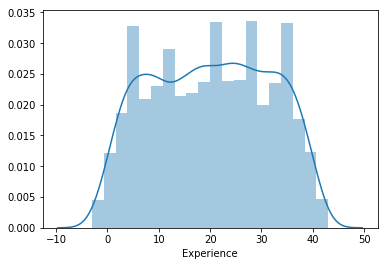

In [14]:
sns.distplot(np.array(personal_loan_df['Experience']), axlabel='Experience')
print('skewness for Experience : {0:.2f}'.format(personal_loan_df.Experience.skew()))

skewness for Age : -0.03


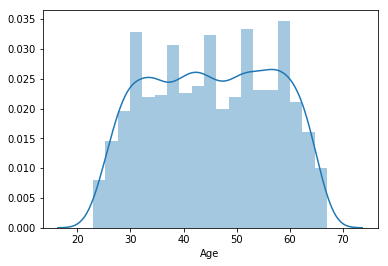

In [15]:
sns.distplot(np.array(personal_loan_df['Age']), axlabel='Age')
print('skewness for Age : {0:.2f}'.format(personal_loan_df.Age.skew()))

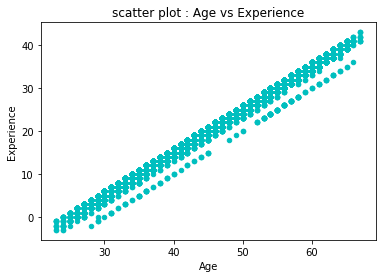

In [16]:
#sns.jointplot(x = 'Age',y = 'Experience',data = personal_loan_df)
personal_loan_df.plot.scatter(x='Age', y='Experience', color='c', title='scatter plot : Age vs Experience');

## It is clear from above plot , Age and Experience are linearly dependant so we can consider only one feature for training data set

skewness for CCAvg_Yearly : 1.60


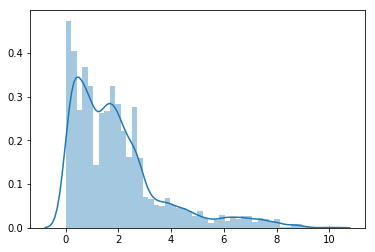

In [17]:
sns.distplot(np.array(personal_loan_df['CCAvg']))
print('skewness for CCAvg_Yearly : {0:.2f}'.format(personal_loan_df.CCAvg.skew()))

skewness for CCAvg_Yearly : 1.60


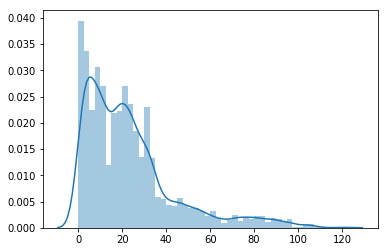

In [18]:
sns.distplot(np.array(personal_loan_df['CCAvg_Yearly']))
print('skewness for CCAvg_Yearly : {0:.2f}'.format(personal_loan_df.CCAvg_Yearly.skew()))

skewness for Income : 0.84


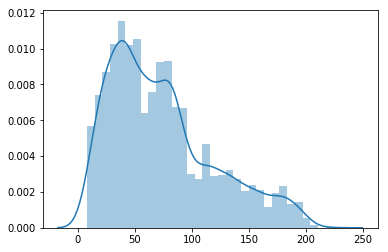

In [19]:
sns.distplot(np.array(personal_loan_df['Income']))
print('skewness for Income : {0:.2f}'.format(personal_loan_df.Income.skew()))

skewness for Mortgage : 2.10


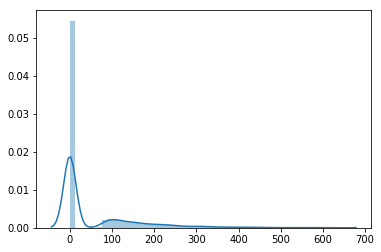

In [20]:
sns.distplot(np.array(personal_loan_df['Mortgage']))
print('skewness for Mortgage : {0:.2f}'.format(personal_loan_df.Mortgage.skew()))

Text(0.5, 1.0, 'Family')

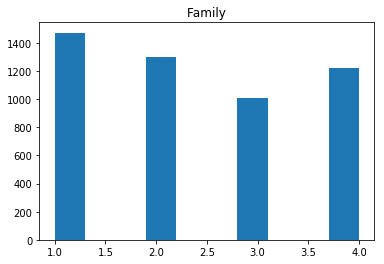

In [21]:
plt.hist(personal_loan_df['Family'])  
plt.title("Family")

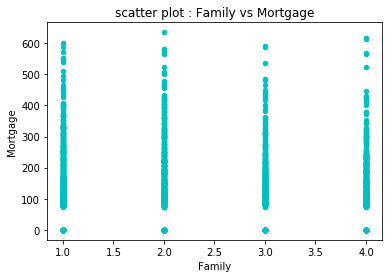

In [22]:
personal_loan_df.plot.scatter(x='Family', y='Mortgage', color='c', title='scatter plot : Family vs Mortgage');

Text(0.5, 1.0, 'Securities Account')

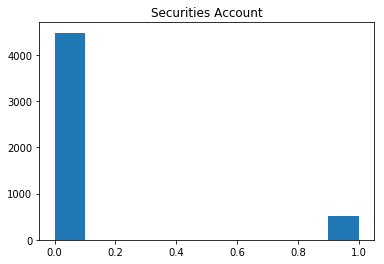

In [23]:
plt.hist(personal_loan_df['Securities Account'])   
plt.title("Securities Account")

Text(0.5, 1.0, 'Education')

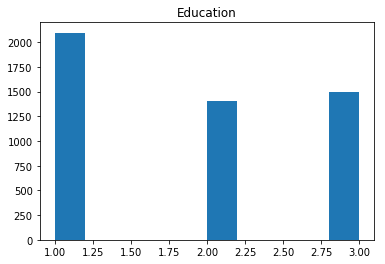

In [24]:
plt.hist(personal_loan_df['Education'])  
plt.title("Education")

Text(0.5, 1.0, 'CD Account')

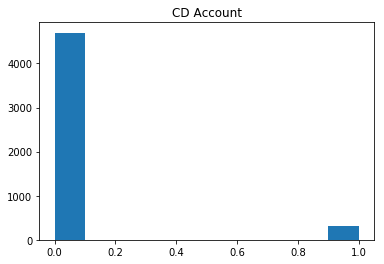

In [25]:
plt.hist(personal_loan_df['CD Account']) 
plt.title("CD Account")

Text(0.5, 1.0, 'Online')

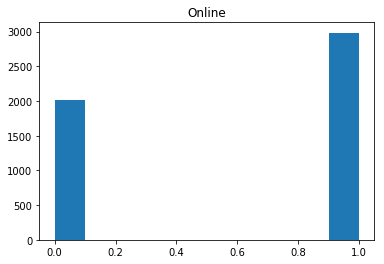

In [26]:
plt.hist(personal_loan_df['Online']) 
plt.title("Online")

Text(0.5, 1.0, 'CreditCard')

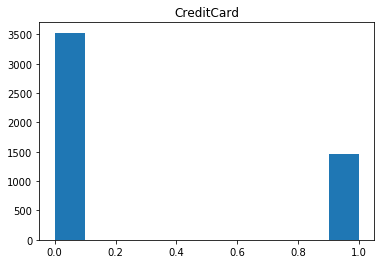

In [27]:
plt.hist(personal_loan_df['CreditCard']) 
plt.title("CreditCard")

In [30]:
#plt.hist(personal_loan_df['ZIP Code']) 
#plt.title("ZIP Code")

### Get the target column distribution. Your comments

Text(0.5, 1.0, 'Personal Loan')

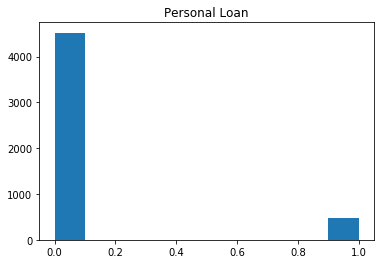

In [29]:
plt.hist(personal_loan_df['Personal Loan'])  # arguments are passed to np.histogram
plt.title("Personal Loan")

### Split the data into training and test set in the ratio of 70:30 respectively

In [31]:
x = personal_loan_df.drop(columns=['ID', 'Experience', 'ZIP Code','Personal Loan'])
Y = personal_loan_df['Personal Loan']

x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=142)

### Using different classification models Logistic, K-NN and Naïve Bayes to predict the likelihood of a liability customer buying personal loans

#### 1. Logistic Model

In [67]:
x_train_logistic = x_train
x_test_logistic = x_test
y_train_logistic = y_train
y_test_logistic = y_test

In [68]:
logistic_model = LogisticRegression(solver='newton-cg')
logistic_model.fit(x_train_logistic, y_train_logistic)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
predictions = logistic_model.predict(x_test_logistic)

In [70]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
accuracy_score_logistic = metrics.accuracy_score(y_test_logistic, predictions)
print ('Accuracy Score of Logistic Model:',accuracy_score_logistic)

Accuracy Score of Logistic Model: 0.954


#### 2. K-NN Model

In [36]:
x_train_knn = x_train
x_test_knn = x_test
y_train_knn = y_train
y_test_knn = y_test

In [37]:
x_train_scaled = zscore(x_train_knn)
x_test_scaled = zscore(x_test_knn)

In [38]:
knn_model = KNeighborsClassifier(n_neighbors= 51)
knn_model.fit(x_train_scaled, y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=51, p=2,
           weights='uniform')

In [39]:
# For every test data point, predict it's label based on nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels_knn = knn_model.predict(x_test_scaled)

In [55]:
accuracy_score_knn = metrics.accuracy_score(y_test_knn, predicted_labels_knn)
print ('Accuracy Score of KNN Model:',accuracy_score_knn)

Accuracy Score of KNN Model: 0.9386666666666666


#### 3. Naive Bayes Model

In [63]:
x_train_nb = x_train
x_test_nb = x_test
y_train_nb = y_train
y_test_nb = y_test

In [64]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
nb_model = GaussianNB()
nb_model.fit(x_train_nb, y_train_nb)

GaussianNB(priors=None, var_smoothing=1e-09)

In [65]:
# make predictions
predicted_nb = nb_model.predict(x_test_nb)

In [66]:
accuracy_score_knn = metrics.accuracy_score(y_test_nb, predicted_nb)
print ('Accuracy Score of Naive Bayes Model:',accuracy_score_knn)

Accuracy Score of Naive Bayes Model: 0.8773333333333333


### Print the confusion matrix for all the above models (5 points)

#### 1. Logistic Model

In [73]:
print (confusion_matrix(y_test_logistic,predictions))

[[1348   19]
 [  50   83]]


Text(33.0, 0.5, 'Actual')

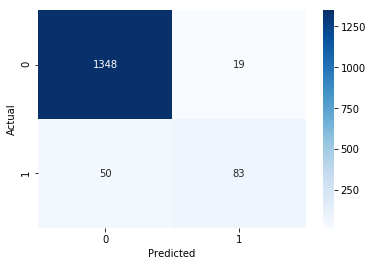

In [74]:
sns.heatmap(confusion_matrix(y_test_logistic,predictions), annot=True, cmap='Blues',fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [75]:
print(classification_report(y_test_logistic,predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1367
           1       0.81      0.62      0.71       133

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.89      0.81      0.84      1500
weighted avg       0.95      0.95      0.95      1500



#### 2. K-NN Model

In [47]:
metrics.confusion_matrix(y_test_knn,predicted_labels_knn)

array([[1361,    6],
       [  86,   47]], dtype=int64)

Text(33.0, 0.5, 'Actual')

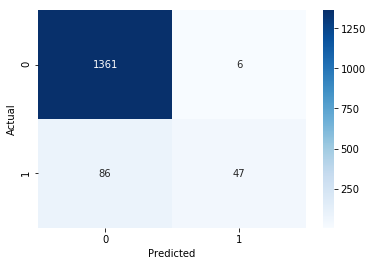

In [60]:
sns.heatmap(confusion_matrix(y_test_knn,predicted_labels_knn), annot=True, cmap='Blues',fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [48]:
print(metrics.classification_report(y_test_knn,predicted_labels_knn))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1367
           1       0.89      0.35      0.51       133

   micro avg       0.94      0.94      0.94      1500
   macro avg       0.91      0.67      0.74      1500
weighted avg       0.94      0.94      0.93      1500



#### 3. Naive Bayes Model

In [50]:
print(metrics.confusion_matrix(expected_nb, predicted_nb))

[[1233  134]
 [  50   83]]


Text(33.0, 0.5, 'Actual')

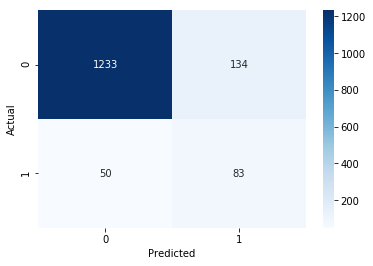

In [61]:
sns.heatmap(confusion_matrix(expected_nb,predicted_nb), annot=True, cmap='Blues',fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [62]:
print(metrics.classification_report(expected_nb, predicted_nb))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1367
           1       0.38      0.62      0.47       133

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.67      0.76      0.70      1500
weighted avg       0.91      0.88      0.89      1500



### Observations

#### In this case if prediction is false but actually personal loan can be converted will be costly / bad for bank.(Type I error)
#### So, we need to consider low type I errror. while comparing all the models Logistic and Naive Baes are good.
#### Also, considering better accuracy score and low Type II error as well, we can choose Logistic model for the prediction

In [ ]:
##### can use grid serach CV for improving the models

from sklearn.model_selection import GridSearchCV
KNeighborsClassifier
parameters = {'n_neighbors':[5,11,15,21,25,31,35,41], 
              'weights':('uniform', 'distance'), 
              'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'), 
              'leaf_size': [10,20,30,40,50], 
              'metric': ('minkowski', 'euclidean')}
knn = KNeighborsClassifier()
knn_gsc = GridSearchCV(knn, parameters, cv=10)
knn_gsc.fit(x_train_scaled, y_train_knn)

In [ ]:
print ('best params ', knn_gsc.best_params_)
print ('best score ', knn_gsc.best_score_)
predicted_knn_gsc = knn_gsc.predict(x_test_scaled)
acc_score = metrics.accuracy_score(y_test_knn,predicted_knn_gsc)
print ('accuracy score: ',acc_score)
print ('cnfusion matrix ', metrics.confusion_matrix(y_test_knn,predicted_knn_gsc))
print('classification metrics', metrics.classification_report(y_test_knn,predicted_knn_gsc))